# FNCE30012: Foundations of Fintech - Assignment 3

## Task 2

### Setting
Equifax Australia has provided us with synthetic loan application data from Australian proprietary companies. This data was generated to match the characteristics of *actual* loan applications. The Equifax data consists of two parts, which, to make it easier for you, we have merged together into one data set:

1. **Company Business Trading History Data**: This first part of the data set contains historical business trading data from 25,000 Australian proprietary companies who successfully applied for a loan in 2017 or 2018.


2. **Director Data**: This second part of the data set contains information on up to four directors of each company. In case a company has more than one director, the corresponding data has been averaged across directors at the company level.


Since this is proprietary data that belongs to Equifax, we are not allowed to give you direct access to it. However, thanks to Jupyter Hub, you are able to access it remotely. In particular, relying on the functions introduced below, you are able to analyse the data at an aggregate level and to use it for the estimation of credit scoring models.

The file called **Equifax_Data_Dictionary.xlsx** provides you with the dictionary for both company and director level data.


#### Helpful commands
The merged Equifax dataset will be referred to by the name `assignment3a`. Please see the Jupyter notebook **Assignment_3_Lecture_Intro.ipynb** for detailed instructions on how to apply the `send_nn_request()` function to remote data. We have implemented additional functions to help you with this assignment:

* `send_grouped_mean_request()`: This function returns a Pandas data frame that contains grouped means of a given variable with respect to another variable. For example, `send_grouped_mean_request("data": data_set,"var": x, "y": y}` will return a data frame that contains the mean value of `y` for each existing value of `x`. It takes 3 input arguments:
    1. `"data"`: A reference to the remote data set
    2. `"var"`: The variable used to form groups
    3. `"y"`: The output (target) variable for which to calculate means\vspace{5pt}

* `send_glm_request()`: This function outputs the detailed results of a full-fledged logistic regression model without any prior feature selection. It takes 2 input arguments:
    1. `"data"`: A reference to the remote data set
    2. `"y"`: The output (target) variable (dependent variable)\vspace{5pt}

* `send_logit_request()`: This function is similar to the `send_nn_request()` method, but it returns the performance measures of a remotely estimated (customised) logistic regression. It takes 5 input arguments:
    1. `"data"`: A reference to the remote data set
    2. `"test"`: The fraction of the remote data that should be used as test data
    3. `"x"`: A list of input features (independent variables)
    4. `"y"`: The output (target) variable (dependent variable)
    5. `"scale"`: A boolean variable ("True" / "False") indicating if scaling should be applied to the input data
     


#### Predefined variables
For your convenience, we have predefined certain variables which you should reuse for this second part of the assignment:
1. `data`: The remote Equifax data set
2. `target`: The target variable (default indicator over 12 months): 0 means "no default" / 1 means "default"
3. `all_features`: The complete list of available features

**Note**: Please do not change the values of these variables.

In [2]:
## Execute this cell

# Predefined Variables == DO NOT EDIT THESE ==

# the merged Equifax data set
data = 'assignment3a'

# the target (dependent) variable of interst (good/bad flag):
# 0 means no default within 12 months / 1 means default
target = 'Commercial_GBF_12m'

# the complete list of available features as of the loan approval date
# see Equifax_Data_Dictionary.xlsx for details
all_features = ['EFX_Comp_ID',                  'loanAmt',
                'External_Admin',               'Petitions',
                'Writs_and_Summons',            'Writs_and_Summons_Value',
                'Writs_and_Summons_LT_12M',     'Writs_and_Summons_LT_12M_Value',
                'Writs_and_Summons_GT_12M',     'Writs_and_Summons_GT_12M_Value',
                'Judgements',                   'Judgements_Value',
                'Judgements_LT_12M',            'Judgements_LT_12M_Value',
                'Judgements_GT_12M',            'Judgements_GT_12M_Value',
                'Directors',                    'Defaults',
                'Defaults_Value',               'Defaults_12',
                'Defaults_12_Value',            'Defaults_GT_12M',
                'Defaults_GT_12M_Value',        'Telco_Defaults_LT_12M',
                'Telco_Defaults_LT_12M_Value',  'Utility_Defaults_LT_12M',
                'Other_Defaults_LT_12M',        'Other_Defaults_LT_12M_Value',
                'Defaults_Paid',                'Defaults_Paid_Value',
                'Defaults_Unpaid',              'Defaults_Unpaid_Value',
                'Credit_Enqry',                 'Credit_Enqry_Value',
                'Credit_Enqry_LT_12M',          'Credit_Enqry_LT_12M_Value',
                'Credit_Enqry_GT_12M',          'Credit_Enqry_GT_12M_Value',
                'Broker_Enqry',                 'Broker_Enqry_Value',
                'Broker_Enqry_LT_12M',          'Broker_Enqry_LT_12M_Value',
                'Broker_Enqry_GT_12M',          'Broker_Enqry_GT_12M_Value',
                'Mercantile_Enqry_LT_12M',      'Mercantile_Enqry',
                'Mercantile_Enqry_GT_12M',      'Mercantile_Enqry_GT_12M_Value',
                'ny7513_df_6m',                 'ny7514_df_12m',
                'ny7516_df_60_84m',             'ny7517_df_tcut_6m',
                'ny7518_df_tcut_12m',           'ny7520_df_tcut_60_84m',
                'ny7568_df_sts_unpd_60_84m',    'ny7585_df_origamt_tcut_60_84m',
                'ny7586_df_origamt_60_84m',     'ny7587_df_latamt_12m',
                'ny7588_df_latamt_60_84m',      'ny7589_df_time_1',
                'ny7591_df_s_1_60_84m',         'ny7601_adv_48_84m',
                'ny7999_enq_7d',                'ny8000_enq_1m',
                'ny8001_enq_3m',                'ny8002_enq_6m',
                'ny8003_enq_12m',               'ny8006_enq_60m',
                'ny8028_enq_rm_1m',             'ny8029_enq_rm_3m',
                'ny8030_enq_rm_6m',             'ny8031_enq_rm_12m',
                'ny8034_enq_rm_60m',            'ny8042_enq_tcut_1m',
                'ny8043_enq_tcut_3m',           'ny8044_enq_tcut_6m',
                'ny8045_enq_tcut_12m',          'ny8048_enq_tcut_60m',
                'ny8049_enq_own_3m',            'ny8050_enq_own_12m',
                'ny8056_enq_amt_1',             'ny8057_enq_amt_2',
                'ny8059_enq_time_1',            'ny8060_enq_time_2',
                'ny8062_enq_amt_3m',            'ny8063_enq_amt_60m',
                'np7504_dj_60m',                'np7505_dj_time_1',
                'np7506_dj_out_amt_60m',        'np7508_dj_out_60m',
                'np7509_wr_48m',                'np7510_wr_out_48m',
                'np7511_wr_60m',                'np7512_wr_out_60m',
                'np8500_dr_cur',                'np8501_dr_time_max_cur',
                'np8502_dr_prev_60m',           'np8508_pr_cur',
                'np8509_dr_prev_120m_ever',     'na8905_ntb_flg',
                'na8902_age_fle_max',           'na8904_age_fle',
                'na8908_age_ind',               'na8920_em_time_1',
                ]

In [1]:
## Execute this cell

# Essential libraries/packages for this part of the assignment
from finml import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nest_asyncio
from tfclient import send_nn_request, send_logit_request, send_glm_request, send_grouped_mean_request

nest_asyncio.apply()

# disable messages to increase output readability
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

## Question 8 (1 mark)

***In the context of credit scoring***, define the meaning of the following classifications:

* True Negative (TN)
* True Positive (TP)
* False Negative (FN)
* False Positive (FP)

Which risk would you rather minimise, the risk of predicting FNs or FPs?

#### Write your answer below (Remove any existing text)

A True positive classification would mean that our model predicts a borrower to default and they are actually defaulters, i.e., a creditor with a low credit score is predicted as a defaulter.
A True negative classification would result in classifying a borrower with a high credit score who would not default, and they do not default.
False positive classification in the context of credit scoring would mean we classify a good creditor with a high credit score as they would default on the loan application.
A False negative classification happens when we predict a bad creditor with a low credit score as they would not default.

In terms of credit scoring you would want to minimise false negative, as you do not want to incorrectly give a high credit score to a defaulter which could lead to an increase in risk of loss. False positives on the other hand could be considered opportunity costs, by not lending to good business, you will only miss out on additional revenue, but it would not lead to adverse effect like default or financial loss.


## Question 9 (2 marks)

Use the `send_grouped_mean_request()` function to create **3 bar plots**. 

The first two plots should show the average default rates (`target`) depending on (i) the number of directors of the borrowing company (`Directors`), and (ii) whether the company had [petitions](https://www.thegazette.co.uk/all-notices/content/101087) (`Petitions`). 

The third plot should show the average loan amount (`loanAmt`) of non-defaulting and defaulting loans. Make sure all plots are appropriately formatted and that their axes are correctly labelled. What do you conclude from each plot?

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

<Figure size 432x288 with 0 Axes>

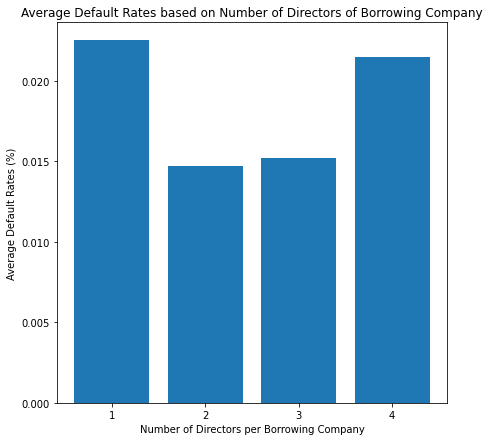

<Figure size 432x288 with 0 Axes>

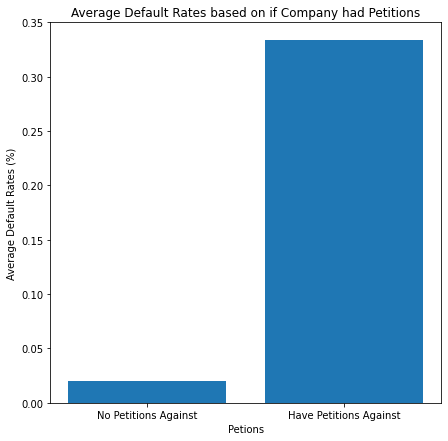

<Figure size 432x288 with 0 Axes>

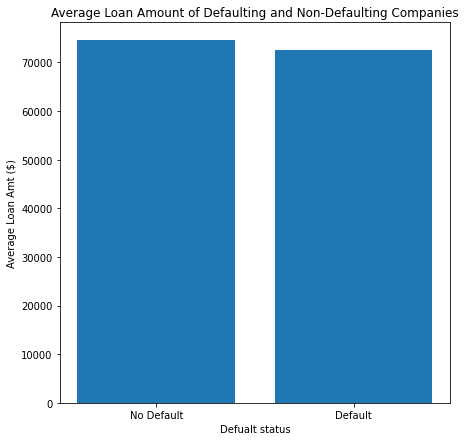

In [3]:
import matplotlib.pyplot as plt
df_directors = pd.DataFrame(send_grouped_mean_request({"data":data,"var": 'Directors',"y":target}))
df_petition = send_grouped_mean_request({"data":data,"var": 'Petitions',"y":target})
df_loan = send_grouped_mean_request({"data":data,"var": target,"y":'loanAmt'})



plot1 = plt.figure(1)
plt.figure(figsize=(7,7))
plt.bar(df_directors.index,df_directors[target])
plt.xticks(df_directors.index)
plt.xlabel('Number of Directors per Borrowing Company')
plt.ylabel('Average Default Rates (%)')
plt.title('Average Default Rates based on Number of Directors of Borrowing Company')
plt.show()

plot2 = plt.figure(2)
plt.figure(figsize=(7,7))
plt.bar(df_petition.index,df_petition[target])
plt.xticks(df_petition.index,["No Petitions Against","Have Petitions Against"])
plt.xlabel('Petions')
plt.ylabel('Average Default Rates (%)')
plt.title('Average Default Rates based on if Company had Petitions')
plt.show()

plot3 = plt.figure(3)
plt.figure(figsize=(7,7))
plt.bar(df_loan.index,df_loan['loanAmt'])
plt.xticks(df_loan.index,["No Default","Default"])
plt.xlabel('Defualt status')
plt.ylabel('Average Loan Amt ($)')
plt.title('Average Loan Amount of Defaulting and Non-Defaulting Companies')
plt.show()


#### Write your conclusion below (Remove any existing text)

The average default rates for companies with one director and four directors are 0.022% and 0.021% whereas companies with two and three directors are considerably lower at 0.014% and 0.015%. This may be due to concentration of power and decision making, in the case of companies with one director the decisions maybe not be discussed thoroughly in contrast companies with four directors, there is a dilution of control, there may be red tapism or slow decision making which impacts the business. Whereas companies with two or three directors seem to perform better with a good balance between quick decision making and good decision making.

The companies with no petitions against them have a default rate of 0.019% which is considerably lower than companies with petitions against them with default rate of 0.33%. Companies with petitions are more likely to be not run well and default, since filing petitions are expensive, creditors would file petitions when the company has already defaulted payments or if they have lost faith that companies can pay them back. If these petitions are granted, then creditors have to be paid back, which can impact the liquidity of the company thereby leading them to default on payments.

The average loan amount for companies that defaulted was \\$72570 and companies that did not default had an average loan amount marginally higher of \\$74542. There is no clear relation between loan amount and defaulting.

## Question 10 (1 mark)

Use the `send_glm_request()` function to run a full-fledged logistic regression model without any ex-ante feature selection.

**Note**: To increase the stability of the estimation, Python will automatically omit certain variables.

In [4]:
send_glm_request({"data":data,"y":target})


Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                25000
Model:                            GLM   Df Residuals:                    24906
Model Family:                Binomial   Df Model:                           93
Link Function:                  logit   Scale:                          1.0000
Method:                            nm   Log-Likelihood:                -1731.2
Date:                Sat, 24 Oct 2020   Deviance:                       3462.4
Time:                        10:02:37   Pearson chi2:                 1.55e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                    

(None, None, {}, {})

## Question 11 (2 marks)

Use the `send_logit_request()` function to run a logit (logistic) model with the following specifications:

* Relative size of test data: 20%
* Only use the features from Question 4 with a significance level below 10%
* Applies scaling

Evaluate the testing performance of your logit (logistic) model.

In [4]:
sig_features=['External_Admin','Petitions','ny7589_df_time_1','ny7601_adv_48_84m',
              'ny8003_enq_12m','ny8050_enq_own_12m','np7506_dj_out_amt_60m']
send_logit_request({"data":data,"test":0.2,"x":sig_features,"y":target,"scale":True})

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

########################################
############## Test Set: ###############
########################################
Precision:  0.8421052631578947
Recall:  0.1509433962264151
Accuracy Score:  0.9814
roc_auc:  0.7953288971478361
Confusion matrix: 
[[4891    3]
 [  90   16]]

########################################
############## Train Set: ##############
########################################
Precision:  0.5740740740740741
Recall:  0.0792838874680307
Accuracy Score:  0.98085
roc_auc:  0.8078492064620362
Confusion matrix: 
[[19586    23]
 [  360    31]]


({'precision': 0.5740740740740741,
  'recall': 0.0792838874680307,
  'accuracy': 0.98085,
  'roc': 0.8078492064620362},
 {'precision': 0.8421052631578947,
  'recall': 0.1509433962264151,
  'accuracy': 0.9814,
  'roc': 0.7953288971478361})

#### Write your evaluation below (Remove any existing text)

An accuracy score of 98.14% implies that our logit model predicts true positves and false positves extremely accurately, i.e, distinguish between good and bad creditors accurately most of the time. We obtain a high precision score of 0.833, which means our model is able to accurately predict true positives (defaulters) and minimise the false positives (reduce opportunity cost). 
We observe a very low recall score of 0.151 which implies our model is only able to correctly identify 15.1% of all defaulters as they would default, this happens due to a high false negative rate, i.e, is predict a bad loan application would not default. We want a model with low false negatives so we can avoid high financial losses. Hence even with a high area under ROC curve of 0.79, we can conclude that we have a poor model based on our recall score which indicates as we are not able to effectively minimise the false negative rates.


## Question 12 (4 marks)

Write a for-loop that uses the `send_nn_request()` function to estimate a series of full-fledged neural networks with the following specifications:

* Number of layers: 1
* Number of units: 1, 4, 16, 128, 256
* Relative size of test data: 20%
* Use all existing features
* Apply scaling

Generate one plot that shows each model's AUC (`roc_auc`), both for testing and training. What is your conclusion?

**Note**: Some outputs of the `send_nn_request()` function are returned as strings and need to be converted to floats before plotting.

1 0


Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 105       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.3333333333333333
Recall:  0.018867924528301886
Accuracy Score:  0.9784
roc_auc:  0.7137976035345552
Loss: 0.37014007568359375
Confusion matrix: 
[[4890    4]
 [ 104    2]]

########################################
############## Train Set: ##############
########################################
Precision:  0.7894736842105263
Recall:  0.03836317135549872
Accuracy

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 420       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.46153846153846156
Recall:  0.11320754716981132
Accuracy Score:  0.9784
roc_auc:  0.7886283550901758
Loss: 0.09224651753902435
Confusion matrix: 
[[4880   14]
 [  94   12]]

########################################
############## Train Set: ##############
########################################
Precision:  0.7605633802816901
Recall:  0.13810741687979539
Accuracy

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.5333333333333333
Recall:  0.22641509433962265
Accuracy Score:  0.9794
roc_auc:  0.825255800325389
Loss: 0.08054833114147186
Confusion matrix: 
[[4873   21]
 [  82   24]]

########################################
############## Train Set: ##############
########################################
Precision:  0.6233766233766234
Recall:  0.24552429667519182
Accura

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               13440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.5588235294117647
Recall:  0.1792452830188679
Accuracy Score:  0.9796
roc_auc:  0.8100706679723344
Loss: 0.08344747126102448
Confusion matrix: 
[[4879   15]
 [  87   19]]

########################################
############## Train Set: ##############
########################################
Precision:  0.6923076923076923
Recall:  0.2531969309462916
Accur

Image(value=b'GIF89aP\x00P\x00\xf7\x00\x00\x00\x00\x00\x01\x01\x01\x02\x02\x02\x10\x03\x08\x1d\x04\r5\x06\x16I…

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               26880     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 27,137
Trainable params: 27,137
Non-trainable params: 0
_________________________________________________________________
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.6176470588235294
Recall:  0.19811320754716982
Accuracy Score:  0.9804
roc_auc:  0.7975717281846851
Loss: 0.0864272192120552
Confusion matrix: 
[[4881   13]
 [  85   21]]

########################################
############## Train Set: ##############
########################################
Precision:  0.6764705882352942
Recall:  0.23529411764705882
Accu

<Figure size 432x288 with 0 Axes>

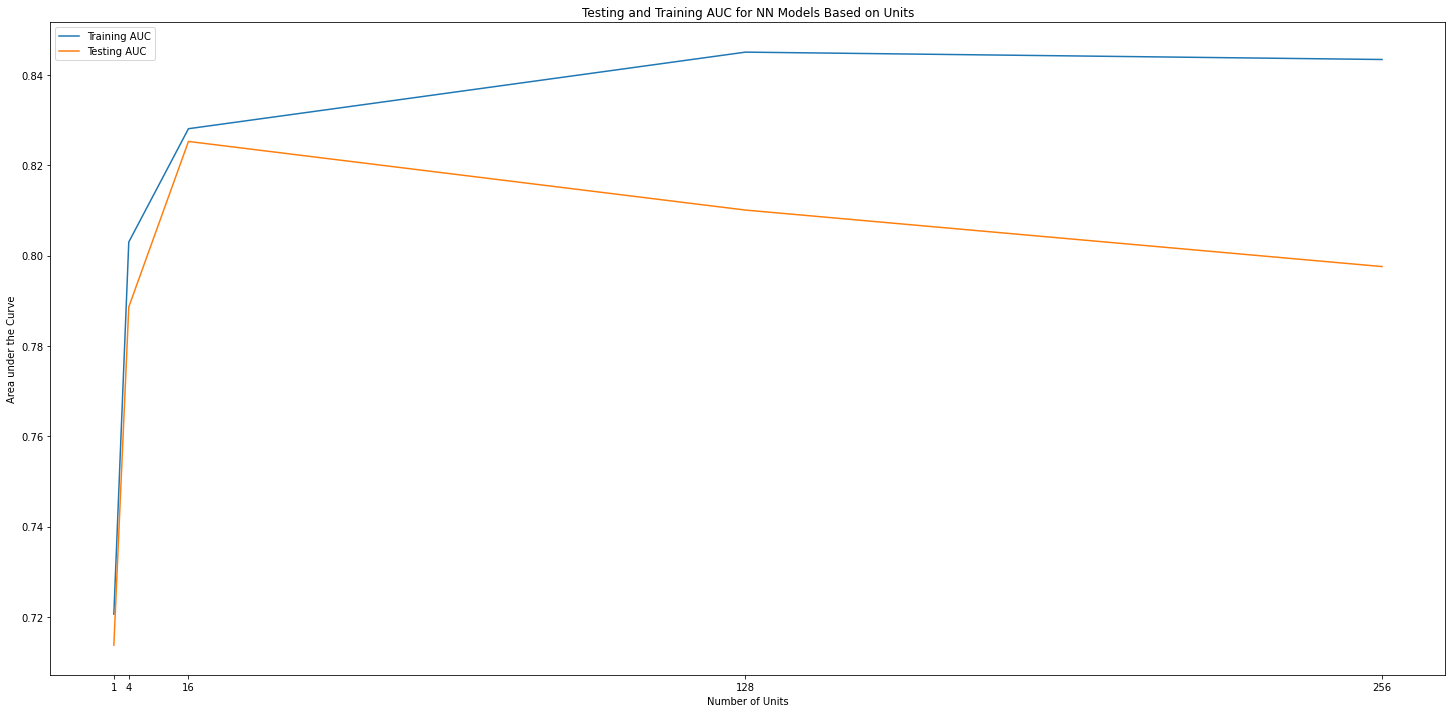

In [9]:
units = [1,4,16,128,256]
training_res=["-","-","-","-","-"]
testing_res = ["-","-","-","-","-"]
for i in units:
    a = units.index(i)
    print(i,a)
    #define parameters and send request to server
    params = {"data": data, "layers": 1, "units": i, "test": 0.2, 
          "x": all_features, "y": target, "scale": True, "verbose": 0}
    # send request to server
    (model, scaler, training, testing) = send_nn_request(params)
    training_res[a]=(training)
    testing_res[a]= (testing) 
    
testing_res
tests_auc = []
training_auc = []
for test in testing_res:
    tests_auc.append(test['roc'])
for train in training_res:    
    training_auc.append(train['roc'])
roc_auc =[]
for auc in range(len(tests_auc)):
    tr = training_auc[auc]
    te = tests_auc[auc]
    temp = (tr,te)
    roc_auc.append(temp)

# Plotting ROC's

x=pd.DataFrame()
y=np.array(tests_auc)
z=np.array(training_auc)
x['Units']=np.array(units)
x['Training AUC']=z
x['Testing AUC'] = y
x.set_index('Units',inplace = True)
x
plot_auc = plt.figure(4)
plt.figure(figsize=(25,12))
plt.plot(x['Training AUC'])
plt.plot(x['Testing AUC'])
plt.xticks(x.index)
plt.xlabel("Number of Units")
plt.ylabel("Area under the Curve")
plt.title("Testing and Training AUC for NN Models Based on Units")
plt.legend(x)


#### Write your conclusion below (Remove any existing text)

We observe both testing and training performance improve until we use 16 units, but increasing neurons beyond that results in testing performance to consistently fall while training performance improves, in this case our model starts to overfit (high variance and low bias). High in sample performance is an indicator of overfitting, overfitting leads to poor performance of our neural network when new or unseen data set is introduced. We can prevent overfitting by simplifying our model and use 16 units or by carrying out a cross validation i.e., splitting our training data into smaller test-train splits and evaluate them, this will help in fine tuning our model.

## Question 13 (3 marks)

The average loan amount across the Equifax sample equals approximately $75,000. Furthermore, let us make the following simplifying assumptions:

1. The interest rate charged for each loan is 5\% per year
2. Each loan has a duration of one year
3. If a loan defaults, the total amount is lost (zero recovery) and no interest payments occur
4. A loan application only gets granted, if the respective model predicts no default
5. Each granted loan costs the lender 1\% per year to issue

You are running a business that lends loans of $75,000 to small companies.

* Based on the above 20\% **testing data**, what would be the difference in your income if you were using either the logit model predictions (Question 11) or the neural network predictions based on **16 units** (Question 12)?
* At what recovery rate would to two model predictions yield the same income?

**Note:** For your calculations, you can neglect any time-value-of-money effects. The recovery rate is defined as the percentage of the loan amount that the lender is able to recover in the case of default.

#### Write your answer below (Remove any existing text)

Since loans with no default predictions are granted we need to look at the true negative and false negative values of our confusion matrix, true negative values would be the loans with no default and earn 5% interest while false negative value would be loans that default and we lose the entire loan amount.\
Logit Function Confusion Matrix:\
[[4891    3]\
 [  90   16]]\
NN Confusion Matrix:\
[[4873   21]\
 [  82   24]]

Logit Function Income:\
Revenue = 4891 * 0.05 * 75000 = 18341250\\$ \
Loss = 4981 * 75000 * 0.01 +( 75000* 90) = 10485750\\$\
Income = Revenue - Loss = 7855500\\$\
Neural Network Income:\
Revenue = 4873 * 75000 * 0.05 = 18273750\\$\
Loss = 4955 * 0.01 * 75000 + 82 * 75000 = 9866250\\$\
Income = Revenue - Loss = 8407500\\$\
Difference in income from using logit function instead of neural network is (-)\\$552000.

Let the recovery rate be m

7855500 + (90 * 75000)m = 8407500 + (82 * 75000)m\
        600000 m = 552000\
        m = 0.92\
When the recovery rate is 0.92 or 92\% income from logit function and neural network will be the same, we get such a high value because when there is a gain our additional income is 75000 * 0.04 (interest - cost of issue), but when there is a loss we lose the entire 75000/$, hence a high false negative rate can prove to be very costly. 







## Question 14 (2 marks)

Based on your answers to Question 13, which prediction method would you prefer? 

More generally, provide two pros and two cons of using hierarchical machine learning (such as neural networks) vs. standard regression analysis in the context of credit scoring.

#### Write your answer below (Remove any existing text)

The results from question 13 reinforces the importance of minimising the wrong classification of bad borrowers as they would not default (false negatives). Despite the logit model predictions having 18 more good loans (true negative rate) than the neural network prediction, the higher losses from the bad loans (false negatives) had a drastic negative effect on its income. 
Hence, we would prefer a method that minimises the false negative rate and hence the neural network with 16 units and 1 layer.\
The pros of using hierarchical machine learning (such as neural network) in the context of credit scoring are:
   * Neural networks are useful in identifying complex non linear relationships between dependant and independent variable, in our case the business' that would default (dependant variable) based on features used for loan approval. The hidden layers in neural network enable you to find patterns of patterns while for regressions you need to specify the pattern you are looking for ex-ante. 
   * Machine learning can compute all possible interactions between predictor variables which may be useful and perform well with large datasets, since there are usually a high volume of loan applications to process, machine learning can be more useful.
   
The cons of using hierarchical machine learning (such as neural network) instead of standard regression analysis in the context of credit scoring are:
   * The hidden layers act as a black box, it can be difficult to understand why a neural network has deemed a predictor variable relevant for predicting default. In terms of credit scoring, if a person is denied a loan, they would want to know why their application is rejected, if we use ML, it would be difficult to pick the particular factor that resulted in the model to predict that the borrower would default (low interpretability).
   * Neural networks are prone to overfitting and hence can lead to inaccurate predictions of default which can be disastrous. Since several loan applications are made every year, by different people with different history, it is important for our model to perform well with new data and not work well with only a particular data set.